#Misael Gonzalez Soria

In [295]:
from google.colab import drive
drive.mount('/content/drive') 
# Importamos las librerías a utilizar
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Primero cargamos la base de datos en la variable DF

In [296]:
#a)
df=pd.read_csv('/content/drive/MyDrive/basededatos/IMM_2020 - Base de marginación 2020.csv')
# elimine ultimos dos renglones e
df=df.iloc[:-2,:]


#Mostramos la descripción de la base de datos y datos interesantes


In [297]:
#b)

#Ver que tipos de datos tiene por columna
df.info()


#Vimos que hay datos tipo string en la columna de población total y tipo float, los cambio a int a continuacion
def string__To_Int(x):
  ''' Cambia datos tipo float o string a int
  ''' 
  if type(x)==type("s"):
    return int(x.replace(" ",""))
  elif x>0:
    return x
  else:
    return 0

df['POB_TOT']=df['POB_TOT'].map(lambda s: string__To_Int(s))

#Ahora si sumamos la población para ver cuantos habitantes hay por entidad (confirmar que coincida con la del pais por estado) y luego vemos cuanta es la población total de la base de datos
print(df.groupby(['NOM_ENT'])['POB_TOT'].sum())

#Ahora confirmamos que coincide con la de Mexico
print('\n {}'.format(df['POB_TOT'].sum()))






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CVE_ENT      2469 non-null   object 
 1   NOM_ENT      2469 non-null   object 
 2   CVE_MUN      2469 non-null   float64
 3   NOM_MUN      2469 non-null   object 
 4   POB_TOT      2469 non-null   object 
 5   ANALF        2469 non-null   float64
 6   SBASC        2469 non-null   float64
 7   OVSDE        2469 non-null   float64
 8   OVSEE        2469 non-null   float64
 9   OVSAE        2469 non-null   float64
 10  OVPT         2469 non-null   float64
 11  VHAC         2469 non-null   float64
 12  PL.5000      2469 non-null   float64
 13  PO2SM        2469 non-null   float64
 14  IM_2020      2469 non-null   float64
 15  GM_2020      2469 non-null   object 
 16  IMN_2020     2469 non-null   float64
 17  Unnamed: 17  2469 non-null   object 
dtypes: float64(12), object(6)
memory usage: 347.3+ K

In [298]:
#b)

#Vemos datos estadisticos
print(df.describe())

#Ver nivel de marginación en municipios de poblacion menor a 50,000
print(df[df['POB_TOT']<50000][['NOM_MUN','IM_2020','GM_2020']].sort_values(by='IM_2020'))

#Ahora veremos el nivel de amrginación en municipios de mas de 900,000
print(df[df['POB_TOT']>900000][['NOM_MUN','IM_2020','GM_2020']].sort_values(by='IM_2020'))




            CVE_MUN       POB_TOT        ANALF        SBASC        OVSDE  \
count   2469.000000  2.469000e+03  2469.000000  2469.000000  2469.000000   
mean   19324.164844  5.103849e+04    10.164585    45.853094     3.160041   
std     7382.892458  1.469907e+05     7.633688    13.981635     5.289313   
min     1001.000000  8.100000e+01     0.350000     5.540000     0.000000   
25%    14079.000000  4.489000e+03     4.430000    35.740000     0.650000   
50%    20226.000000  1.355200e+04     8.200000    46.340000     1.430000   
75%    24027.000000  3.528400e+04    13.790000    55.860000     3.340000   
max    32058.000000  1.922523e+06    53.070000    88.330000    64.450000   

             OVSEE        OVSAE         OVPT         VHAC      PL.5000  \
count  2469.000000  2469.000000  2469.000000  2469.000000  2469.000000   
mean      1.500721     6.118052     7.987254    26.566290    69.900401   
std       2.769215     9.246006     8.973603    10.586603    35.267734   
min       0.000000 

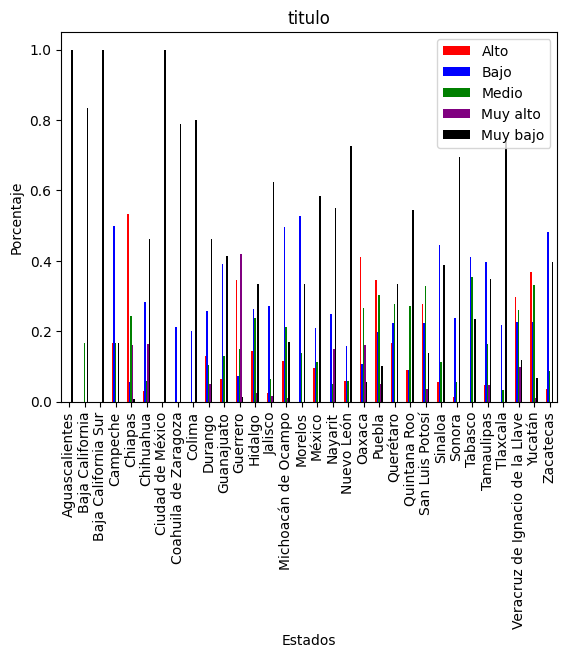

In [299]:
#c) Grafica de % por grado de marginación

#serie de municipios por estado 
municipios_estado=df.groupby('NOM_ENT')['NOM_MUN'].count()

#Lista de grados ordenada
Grados_M=df['GM_2020'].unique().tolist()
Grados_M.sort()

dfestado_porcentaje=pd.DataFrame({'Estado':[],'Alto':[],'Bajo':[], 'Medio':[], 'Muy alto':[],'Muy bajo':[]},)
dfestado_porcentaje=dfestado_porcentaje.set_index('Estado',drop=True)
#df2.loc['Sonora']=[2,0,0,0,0]

k=0

for estado in municipios_estado.index.tolist():
  
  SeriesEstado=df[df['NOM_ENT']==estado].groupby('GM_2020')['NOM_MUN'].count()
  #Agregar ceros a los grados de marginacion que no contiene la SerieEstados
  for i in Grados_M:
    if i not in SeriesEstado.index.tolist():
      SeriesEstado[i]=0
  dfestado_porcentaje.loc[estado]=[SeriesEstado['Alto']/municipios_estado[estado],
                   SeriesEstado['Bajo']/municipios_estado[estado],
                   SeriesEstado['Medio']/municipios_estado[estado],
                   SeriesEstado['Muy alto']/municipios_estado[estado],
                   SeriesEstado['Muy bajo']/municipios_estado[estado]]

#-----------------------

#Un cambio para poder graficas, agregar columna estado (ya no tuve tiempo para arreglar esto bien pero igual funciona)
dfestado_porcentaje['estado']=dfestado_porcentaje.index
dfestado_porcentaje.reset_index(drop=True)
#grafica

dfestado_porcentaje.plot(x='estado', y=['Alto','Bajo','Medio','Muy alto','Muy bajo'],kind="bar",color =['red','blue','green','purple','black'],)
plt.xlabel("Estados")
plt.ylabel("Porcentaje")
plt.title('titulo')
plt.savefig('Imagen-1.jpg')
plt.show()

In [300]:

#serie de poblacion por estado 
poblacion_total_estado=df.groupby('NOM_ENT')['POB_TOT'].sum()

#Lista de grados ordenada
Grados_M=df['GM_2020'].unique().tolist()
Grados_M.sort()

dfestado=pd.DataFrame({'Estado':[],'Alto':[],'Bajo':[], 'Medio':[], 'Muy alto':[],'Muy bajo':[]},)
dfestado=dfestado.set_index('Estado',drop=True)
#df2.loc['Sonora']=[2,0,0,0,0]

k=0
for estado in poblacion_total_estado.index.tolist():
  SeriesEstado=df[df['NOM_ENT']==estado].groupby('GM_2020')['POB_TOT'].sum()
  #Agregar ceros a los grados de marginacion que no contiene la SerieEstados
  for i in Grados_M:
    if i not in SeriesEstado.index.tolist():
      SeriesEstado[i]=0
  dfestado.loc[estado]=[SeriesEstado['Alto']/poblacion_total_estado[estado],
                   SeriesEstado['Bajo']/poblacion_total_estado[estado],
                   SeriesEstado['Medio']/poblacion_total_estado[estado],
                   SeriesEstado['Muy alto']/poblacion_total_estado[estado],
                   SeriesEstado['Muy bajo']/poblacion_total_estado[estado]]

#dfestado es el data frame para graficas % de poblacion por grado de marginacion de cada uno de los estados               

In [302]:
#Igual que en la grafica pasada arreglamos este error
dfestado['estado']=dfestado.index
dfestado.reset_index(drop=True)


,Alto,Bajo,Medio,Muy alto,Muy bajo,estado
0,0.000000,0.000000,0.000000,0.000000,1.000000,Aguascalientes
1,0.000000,0.000000,0.031193,0.000000,0.968807,Baja California
2,0.000000,0.000000,0.000000,0.000000,1.000000,Baja California Sur
3,0.084694,0.275745,0.054745,0.000000,0.584816,Campeche
4,0.310369,0.180050,0.212392,0.188213,0.108977,Chiapas
5,0.006977,0.027347,0.005369,0.048922,0.911385,Chihuahua
6,0.000000,0.000000,0.000000,0.000000,1.000000,Ciudad de México
7,0.000000,0.016130,0.000000,0.000000,0.983870,Coahuila de Zaragoza
8,0.000000,0.045460,0.000000,0.000000,0.954540,Colima
9,0.040971,0.059787,0.020845,0.040861,0.837536,Durango


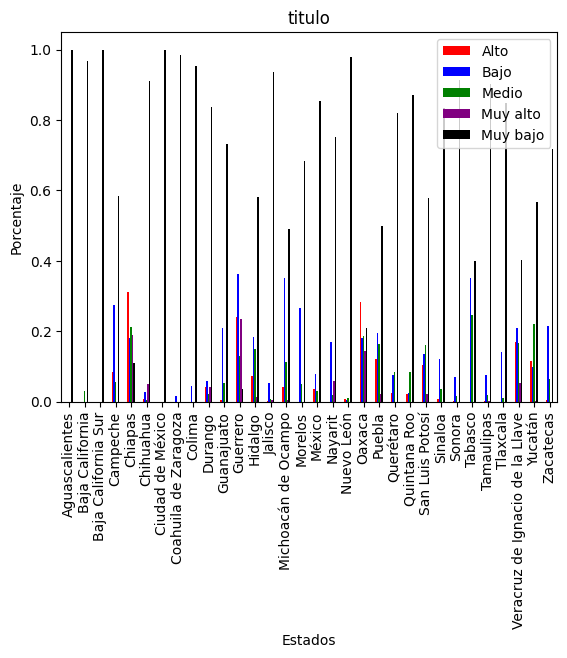

In [303]:
#grafica
dfestado.plot(x='estado', y=['Alto','Bajo','Medio','Muy alto','Muy bajo'],kind="bar",color =['red','blue','green','purple','black'],)
plt.xlabel("Estados")
plt.ylabel("Porcentaje")
plt.title('titulo')
plt.savefig('Imagen-1.jpg')
plt.show()


#e)
Claro que podemos ver una relación, pues en los municipios pequeños se espera que la marginación sea mayor y justo eso es lo que estamos viendo. Aunque esto se puede llegar a opacar por la poblacion con menor marginacón.

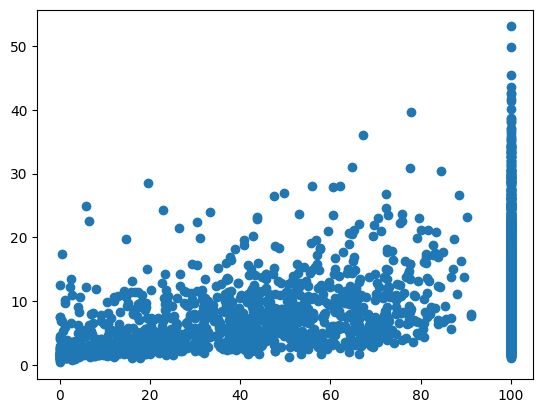

In [304]:
#f)
# Plot the first x and y axes:
plt.plot(df['PL.5000'],df['ANALF'],'o') 
plt.show()

<ipython-input-305-74aca726f3f5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

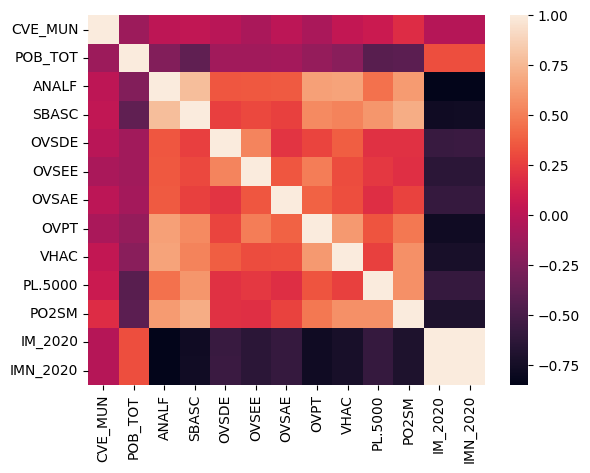

In [305]:
#g
import seaborn as sns
corr=df.corr()
sns.heatmap(corr)

Dada la gráfica de correlación podemos observar que la variable ANALF la cual indica el porcentaje de analfabetismo en personas mayores de 15 años tiene mayor relación con la variable SBASC que indica el porcentaje de población de 15 años o más sin educación básica. Así como también podemos observar que tiene correlación mayor o igual a 0.5 con las variables OVPT, VHAC y PO2SM.

Otra forma de analizar con cuál variable se tiene más correlación es haciendo gráficas de scatterplot comparativas con las demás variables.